# PyMindMonitor

Some constants and imports.

In [97]:
DATABASE = '/Users/sb/Development/projects/PyMindMonitor/mind_monitor/resources/eeg.db'

import sqlite3
import matplotlib.pyplot as plt
%matplotlib inline

#Indices into record
idx = {'session':0, 'timestamp':1, 'highAlpha':2, 'highBeta':3, 'highGamma':4, 'delta':5, 'theta':6, 
       'lowAlpha':7, 'lowBeta':8, 'lowGamma':9,
      'attention':10, 'meditation':11, 'poorSignalQuality':12}

Create connection and a cursor.

In [98]:
conn = sqlite3.connect(DATABASE)
cur = conn.cursor()

Retrieve a set of raw data.

In [99]:
session_id = 4
cur.execute('select * from raw_data where session=? order by timestamp', (session_id,))
raw_data = cur.fetchall()
#raw_data

In [100]:
t_base = None
if len(raw_data) > 0:
    t_base = raw_data[0][1]
    t_data = [x[1] - t_base for x in raw_data]
    r_data = [x[2] for x in raw_data]
    plt.figure(figsize=(15,6))
    plt.xlabel = 'time [sec]'
    plt.ylabel = 'raw data'
    plt.title = 'raw data for session {}'.format(session_id)
    plt.plot(t_data, r_data)
    plt.show()

Retrieve set of records.

In [101]:
cur.execute('select * from records where session=? order by timestamp', (session_id,))
records = cur.fetchall()
#records

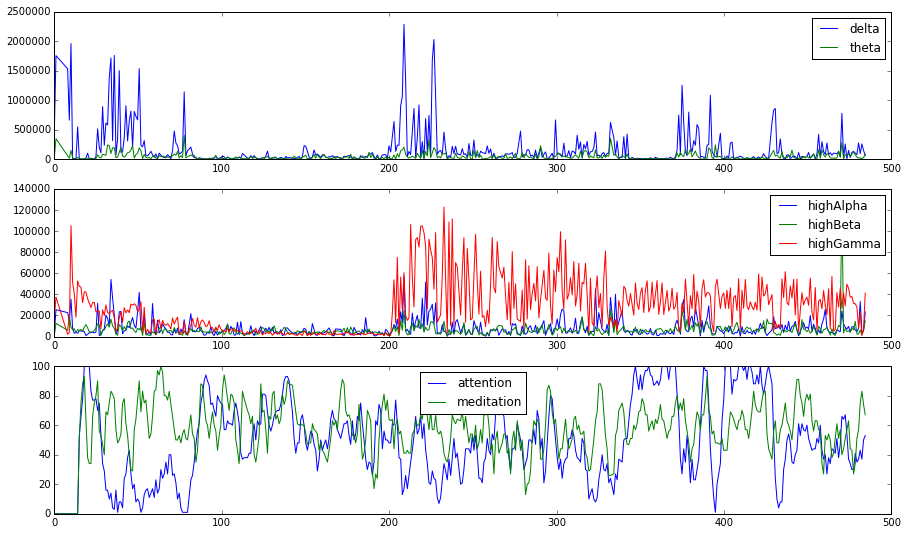

In [104]:
if len(records) > 0:
    if t_base is None:
        t_base = records[0][1]
    t_data = [x[idx['timestamp']] - t_base for x in records]
    delta_data = [x[idx['delta']] for x in records]
    theta_data = [x[idx['theta']] for x in records]
    plt.figure(figsize=(15,9))
    plt.xlabel = 'time'
    plt.ylabel = 'raw data'
    plt.title = 'raw data for session {}'.format(session_id)
    
    plt.subplot(311)
    plt.plot(t_data, delta_data, label='delta')
    plt.plot(t_data, theta_data, label='theta')
    plt.legend(loc='best')
    
    highAlpha_data = [x[idx['highAlpha']] for x in records]
    highBeta_data = [x[idx['highBeta']] for x in records]
    highGamma_data = [x[idx['highGamma']] for x in records]

    plt.subplot(312)
    plt.plot(t_data, highAlpha_data, label='highAlpha')
    plt.plot(t_data, highBeta_data, label='highBeta')
    plt.plot(t_data, highGamma_data, label='highGamma')
    plt.legend(loc='best')
    
    attention_data = [x[idx['attention']] for x in records]
    meditation_data = [x[idx['meditation']] for x in records]

    plt.subplot(313)
    plt.plot(t_data, attention_data, label='attention')
    plt.plot(t_data, meditation_data, label='meditation')
    plt.legend(loc='best')

    plt.xlabel = 'time [sec]'
    plt.ylabel = 'level'
    plt.show()
    t_data

Close connection.

In [103]:
#conn.close()